<a href="https://colab.research.google.com/github/Jio-Kim/ML-DL/blob/main/Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 랜덤 포레스트 손글씨 분류

- MNIST 손글씨 데이터셋을 사용해 랜덤 포레스트 모델과 의사결정 트리 모델을 동일하게 학습시켜서 두 모델의 성능 차이를 시각화하여 비교

In [1]:
# 필요 라이브러리
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 손글씨 데이터 불러오기

In [4]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

### 교차 검증
- MNIST 데이터에 대한 랜덤 포레스트와 의사결정 트리의 검증 정확도 알아보기
- 교차 검증을 10번 수행하여 10번의 검증 정확도를 리스트에 저장

In [3]:
def cross_validation(classifier, features, labels):
  cv_scores = []
  for i in range(18):
    scores = cross_val_score(classifier, features, labels, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
  
  return cv_scores

In [5]:
# 의사결정트리의 MNIST 손글씨 검증 정확도 저장
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)
# 랜덤 포레스트의 MNIST 손글씨 검증 정확도 저장
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)

### 랜덤 포레스트 vs 의사결정 트리의 정확도 시각화

- 10번의 검증 결과를 라인 차트로 시각화하여 랜덤 포레스트와 의사결정 트리의 성능 알아보기
- 검증 결과가 담긴 리스트를 pandas 데이터프레임에 저장한 후 시각화

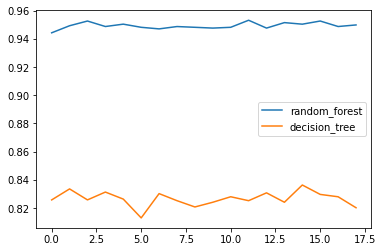

In [9]:
cv_list = {
    'random_forest' : rf_cv_scores,
    'decision_tree': dt_cv_scores,
}

df = pd.DataFrame.from_dict(cv_list)
df.plot()

10번의 검증 결과 모두 랜덤 포레스트가 별도의 하이퍼파라미터 설정 없는 의사결정트리보다 월등히 높음

### 정확도

In [17]:
# 의사결정 트리, 랜덤 포레스트 정확도
print('accuracy of decision tree : ', str(np.mean(dt_cv_scores))) 
print('accuracy of random forest : ', str(np.mean(rf_cv_scores)))

accuracy of decision tree :  0.8266039037174978
accuracy of random forest :  0.9493551279398579
